# ImageStitch
[ImageStitch](https://reference.wolfram.com/language/ref/ImageStitch.html) is a Mathematica function that merges overlapping images into a single image. 
Generally, it can be broken down into the several steps:
1. Find key points in each image [ImageKeyPoints](https://reference.wolfram.com/language/ref/ImageKeypoints.html)
2. Find the corresponding points among the keypoints [ImageCorrespondingPoints](https://reference.wolfram.com/language/ref/ImageCorrespondingPoints.html)
3. Calculate the transformation matrix with the corresponding points [FindGeometricTransform](https://reference.wolfram.com/language/ref/FindGeometricTransform.html)
4. Transform one image into destination image's space [ImagePerspectiveTransformation](https://reference.wolfram.com/language/ref/ImagePerspectiveTransformation.html)
5. Merge the transformed image with the destination image [ImageCompose](https://reference.wolfram.com/language/ref/ImageCompose.html)

In [2]:
(* version check *)
$Version

13.0.0 for Linux x86 (64-bit) (December 10, 2021)

## First try
I will skip the first step: finding image key points, if interested, check out [ImageKeyPoints](https://reference.wolfram.com/language/ref/ImageKeypoints.html)

{-Image-, -Image-}
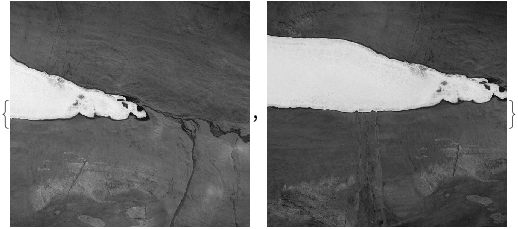

In [4]:
(* let's import two images first *)
img1 = Import["https://data.cresis.ku.edu/data/photogrammetry/Out_FlightLine_3196/pre_CA319632V0036.jpg"];
img1 = ImageResize[img1,Scaled[1/4]];
img2 = Import["https://data.cresis.ku.edu/data/photogrammetry/Out_FlightLine_3196/pre_CA319632V0035.jpg"];
img2 = ImageResize[img2,Scaled[1/4]];
{img1,img2}

-Graphics-
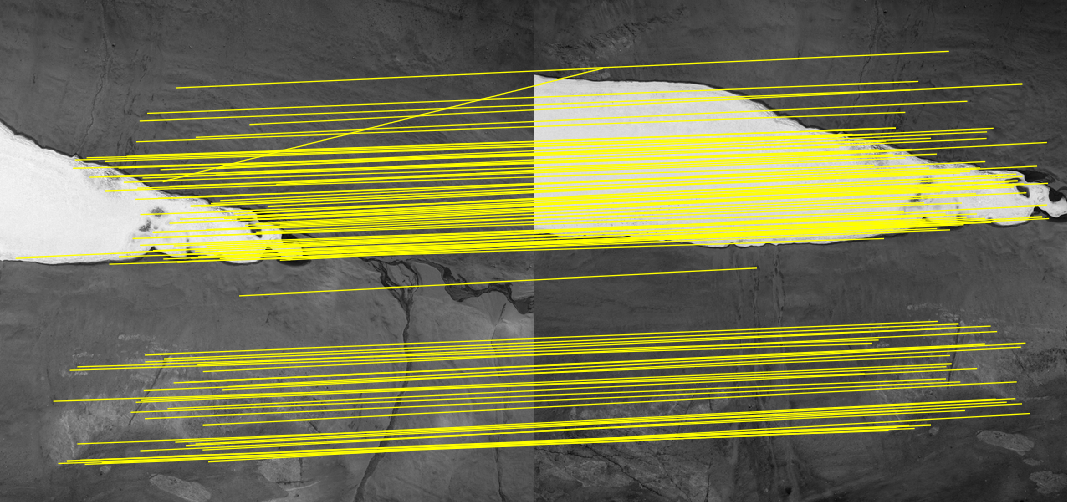

In [10]:
(* extract corresponding points *)
corsPoints=ImageCorrespondingPoints[img1,img2];
Show[ImageAssemble[{img1,img2}],Graphics[{Yellow,MapThread[Line[{#1,#2 + {ImageDimensions[img1][[1]], 0}}]&, corsPoints]}],ImageSize->800]

{0.296098, TransformationFunction[{{1.04799, 0.0388228, -317.484}, 
 
>     {-0.0778619, 0.99601, 5.18359}, {0.0000608498, -0.0000501403, 1.}}]}
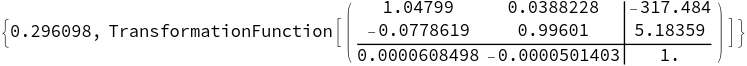

In [13]:
(* find transformation *)
{e,t}=FindGeometricTransform@@corsPoints

-Image-
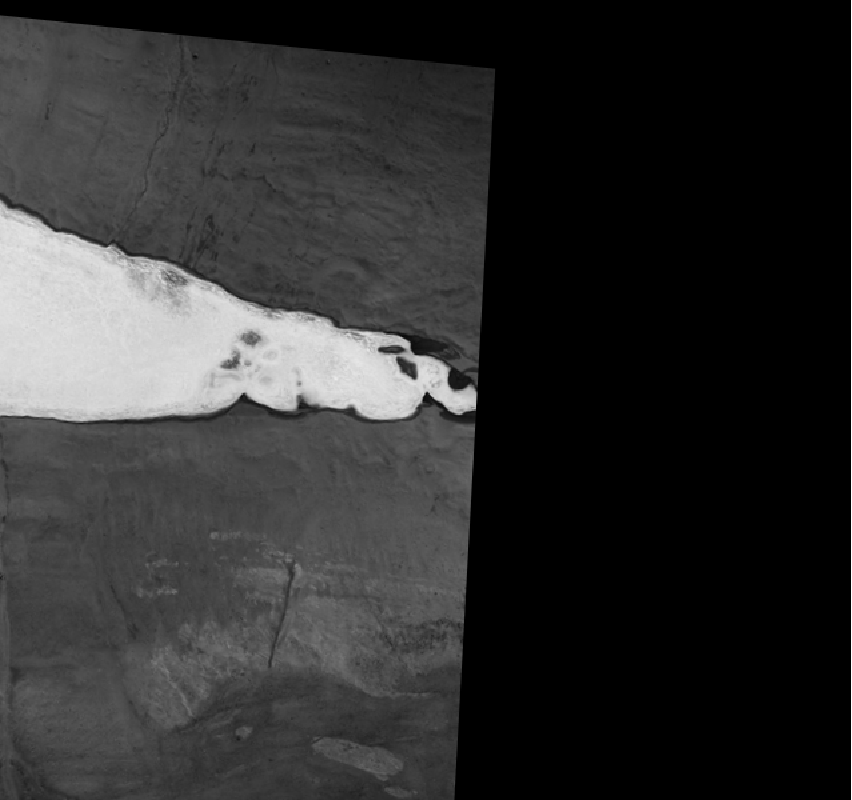

In [36]:
(* transform the second image *)
img2Trans = ImagePerspectiveTransformation[img2, t, DataRange->Full]

-Image-
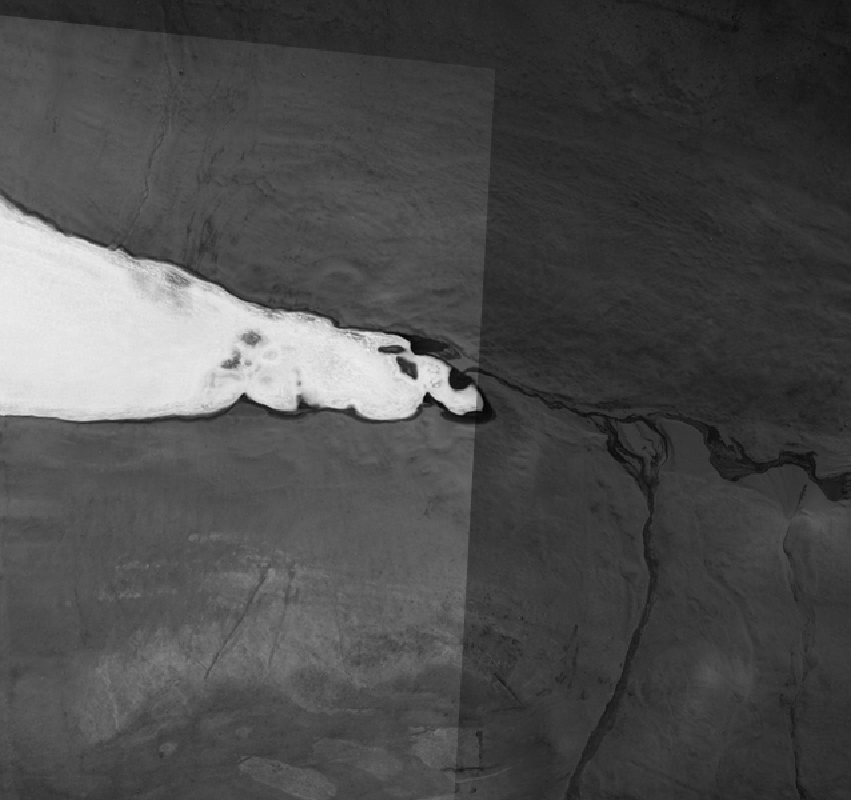

In [34]:
(* merge with the firstimage *)
ImageCompose[img2Trans,{img1,0.6}]

## A better version

-Image-
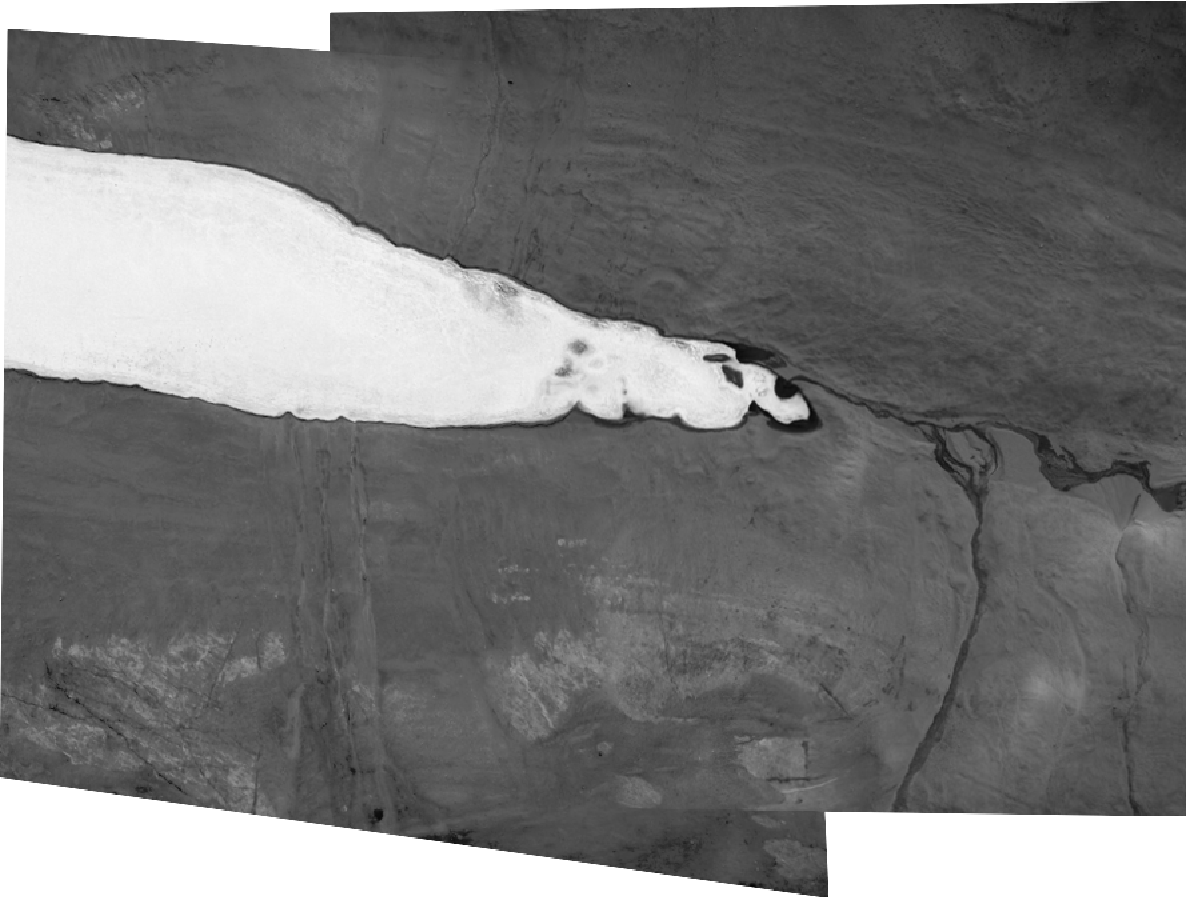

In [18]:
ImageStitch[{img1,img2}]